In [45]:
"""
All pytorch pipline is copied by https://www.kaggle.com/sdelecourt/cnn-with-pytorch-for-mnist

"""


import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import pyvista as pv
import numpy as np
import os
from PIL import Image
import glob


if not os.path.exists("conv"):
    os.makedirs("conv")


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 10
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [46]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.bn2d_1 = nn.BatchNorm2d(16)
        self.relu_1 = nn.ReLU()
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2d_2 = nn.BatchNorm2d(32)
        self.relu_2 = nn.ReLU()
        self.maxpool_2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn2d_1(out)
        out = self.relu_1(out)
        out = self.maxpool_1(out)
        out = self.conv2(out)
        out = self.bn2d_2(out)
        out = self.maxpool_2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)


# Init 2D meshgrid modeling

## 1. Meshgrid block adding CONV1

### 1.1 weight block

In [47]:
BLOCK_VALUE = model.conv1.weight.cpu().detach().numpy()

CONV_BLOCK = np.zeros((20,20))
for index in range(0,16):
    x =  ((index)%4)*5 
    y =  (index//4)*5
    CONV_BLOCK[x:x+5, y:y+5] =BLOCK_VALUE[index][0] 

In [48]:
model.conv1.weight.shape

torch.Size([16, 1, 5, 5])

### 1.2 bias block

In [49]:
# BLOCK_VALUE = model.conv1.bias.cpu().detach().numpy()

# WEIGHT_BLOCK = np.zeros((20,20))
# for index in range(0,16):
#     x =  ((index)%4)*5 
#     y =  (index//4)*5
#     WEIGHT_BLOCK[x:x+5, y:y+5] =BLOCK_VALUE[index]

### 1.3  init block visualization

In [50]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
x, y = np.meshgrid(x, y)
z = CONV_BLOCK*20

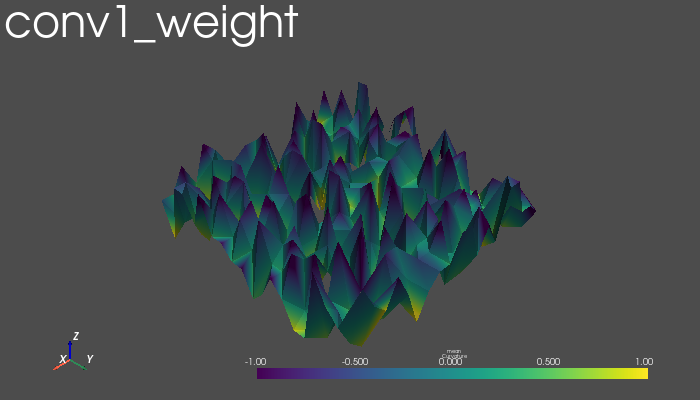

In [51]:
grid = pv.StructuredGrid(x, y, z)
grid = grid.plot_curvature(clim=[-1, 1],text ="conv1_weight",window_size=(700,400))

Epoch [1/10], Step [100/600], Loss: 0.0201
Epoch [1/10], Step [200/600], Loss: 0.0233


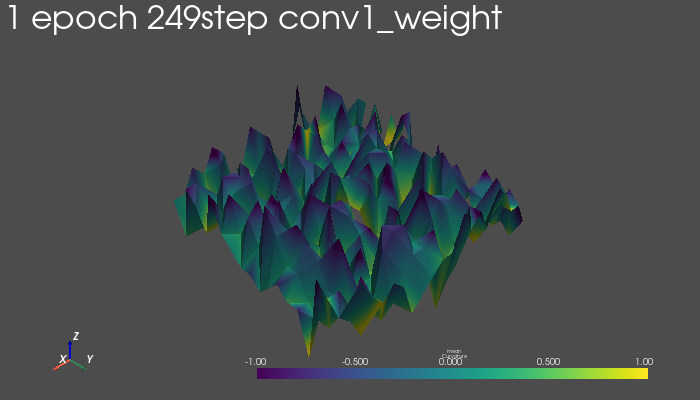

Epoch [1/10], Step [300/600], Loss: 0.1158
Epoch [1/10], Step [400/600], Loss: 0.0351


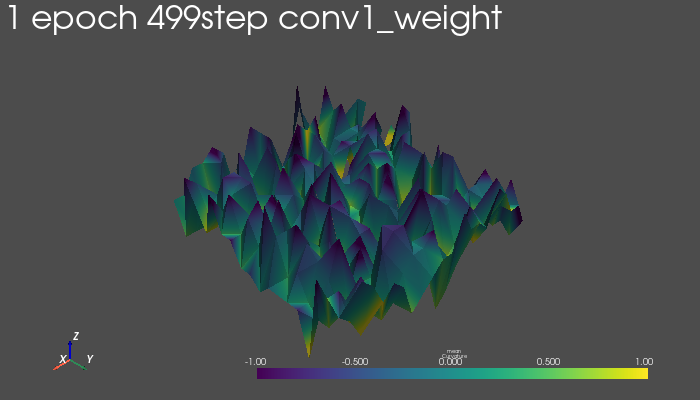

Epoch [1/10], Step [500/600], Loss: 0.1183
Epoch [1/10], Step [600/600], Loss: 0.0156
Epoch [2/10], Step [100/600], Loss: 0.0175
Epoch [2/10], Step [200/600], Loss: 0.0915


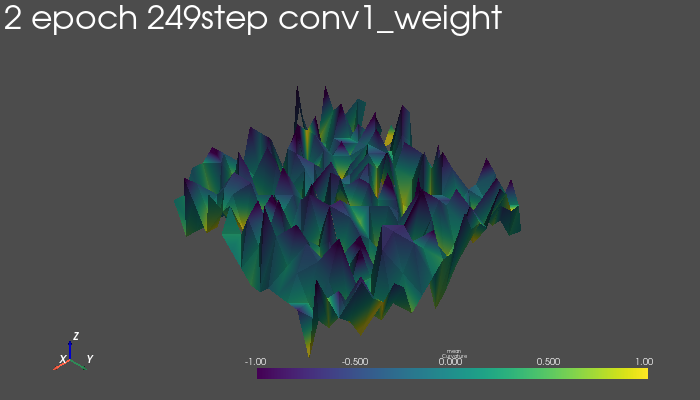

Epoch [2/10], Step [300/600], Loss: 0.0162
Epoch [2/10], Step [400/600], Loss: 0.0344


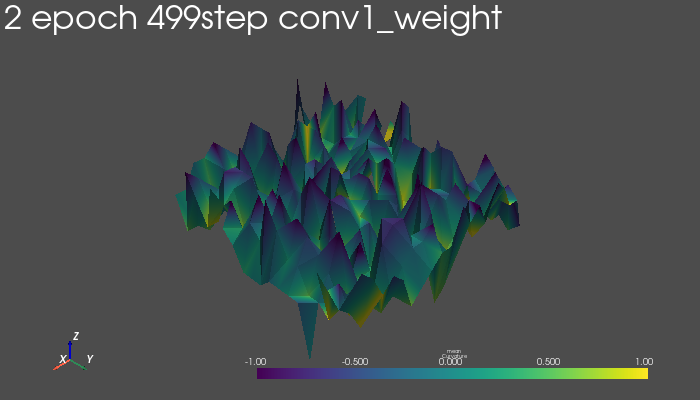

Epoch [2/10], Step [500/600], Loss: 0.0081
Epoch [2/10], Step [600/600], Loss: 0.0102
Epoch [3/10], Step [100/600], Loss: 0.0098
Epoch [3/10], Step [200/600], Loss: 0.0176


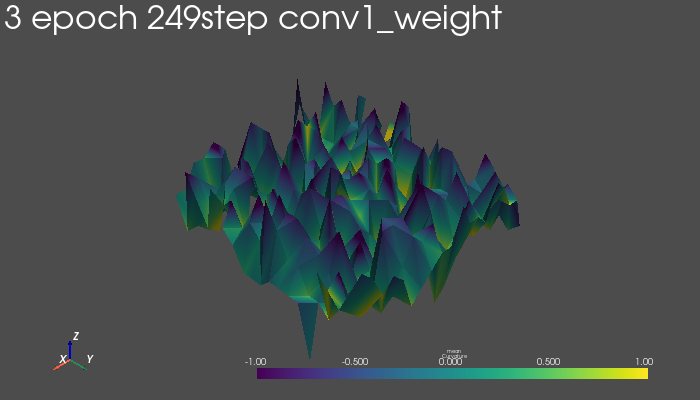

Epoch [3/10], Step [300/600], Loss: 0.0273
Epoch [3/10], Step [400/600], Loss: 0.0441


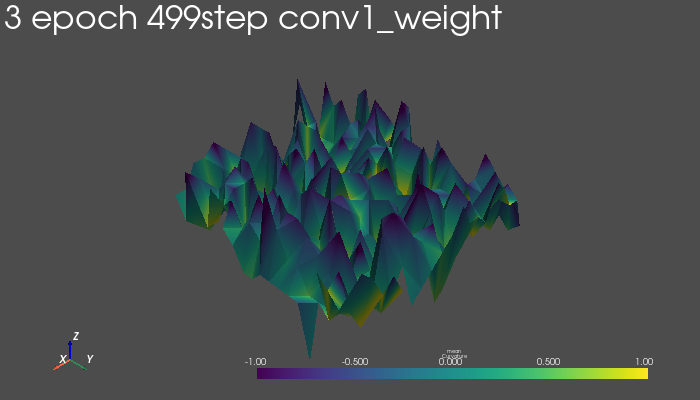

Epoch [3/10], Step [500/600], Loss: 0.0320
Epoch [3/10], Step [600/600], Loss: 0.0498
Epoch [4/10], Step [100/600], Loss: 0.0126
Epoch [4/10], Step [200/600], Loss: 0.0375


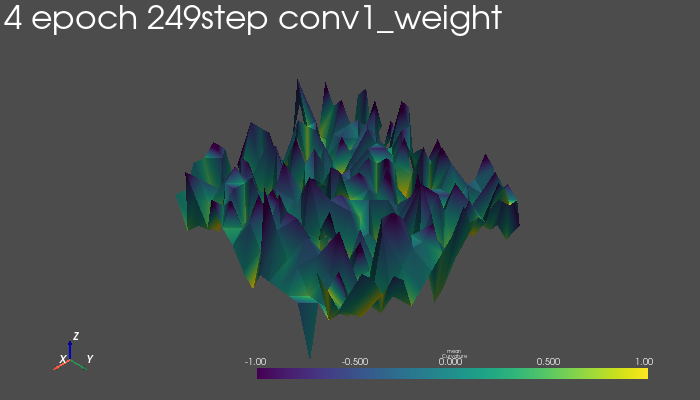

Epoch [4/10], Step [300/600], Loss: 0.0227
Epoch [4/10], Step [400/600], Loss: 0.0102


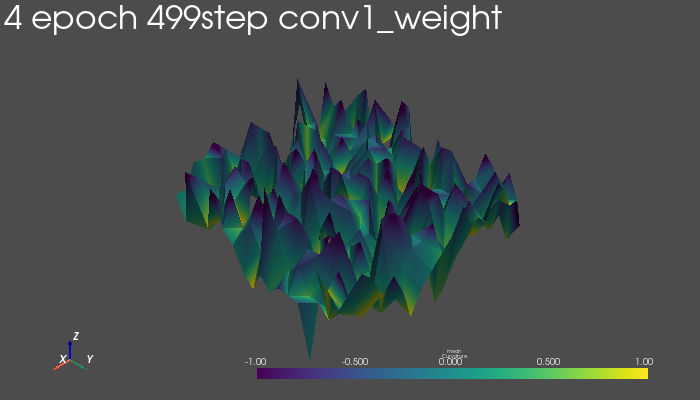

Epoch [4/10], Step [500/600], Loss: 0.0638
Epoch [4/10], Step [600/600], Loss: 0.0024
Epoch [5/10], Step [100/600], Loss: 0.0220
Epoch [5/10], Step [200/600], Loss: 0.0350


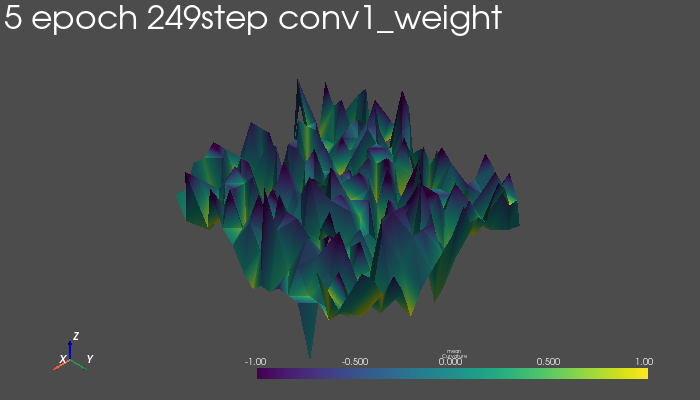

Epoch [5/10], Step [300/600], Loss: 0.0163
Epoch [5/10], Step [400/600], Loss: 0.0248


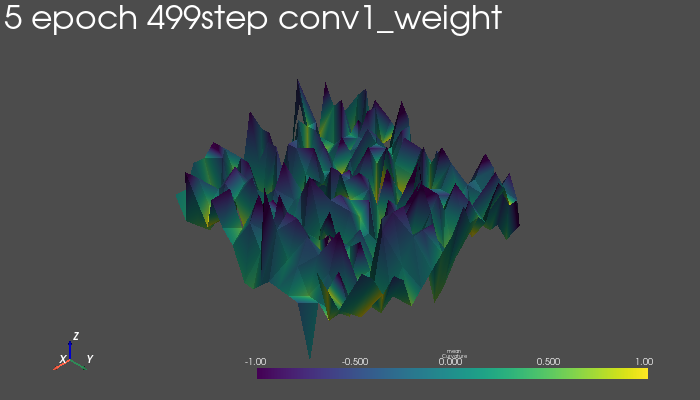

Epoch [5/10], Step [500/600], Loss: 0.0169
Epoch [5/10], Step [600/600], Loss: 0.0404
Epoch [6/10], Step [100/600], Loss: 0.0256
Epoch [6/10], Step [200/600], Loss: 0.0060


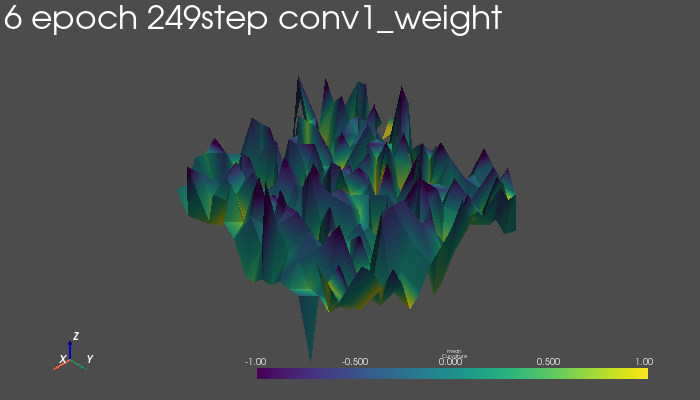

Epoch [6/10], Step [300/600], Loss: 0.0087
Epoch [6/10], Step [400/600], Loss: 0.0350


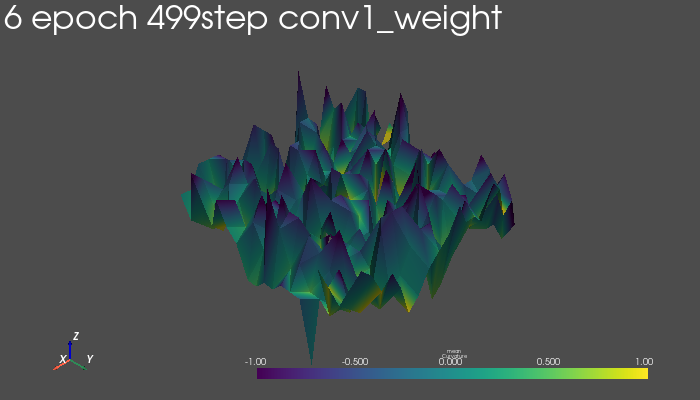

Epoch [6/10], Step [500/600], Loss: 0.0044
Epoch [6/10], Step [600/600], Loss: 0.0032
Epoch [7/10], Step [100/600], Loss: 0.0025
Epoch [7/10], Step [200/600], Loss: 0.0070


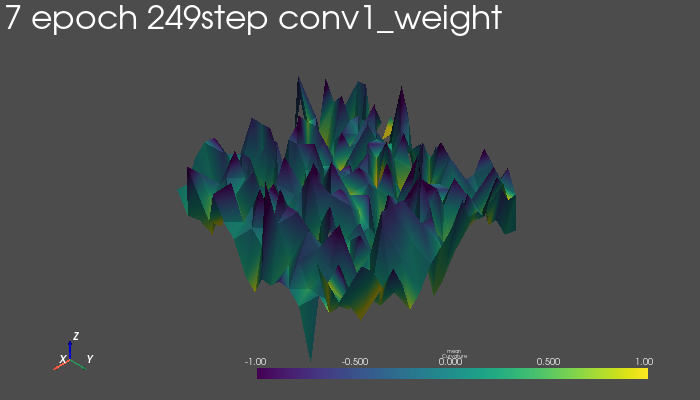

Epoch [7/10], Step [300/600], Loss: 0.0009
Epoch [7/10], Step [400/600], Loss: 0.0627


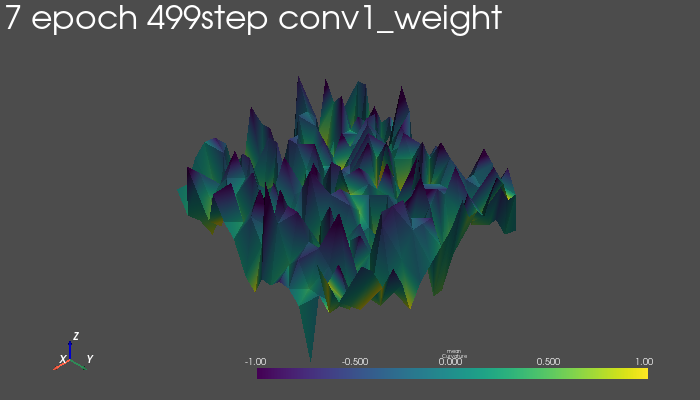

Epoch [7/10], Step [500/600], Loss: 0.0091
Epoch [7/10], Step [600/600], Loss: 0.0149
Epoch [8/10], Step [100/600], Loss: 0.0224
Epoch [8/10], Step [200/600], Loss: 0.0076


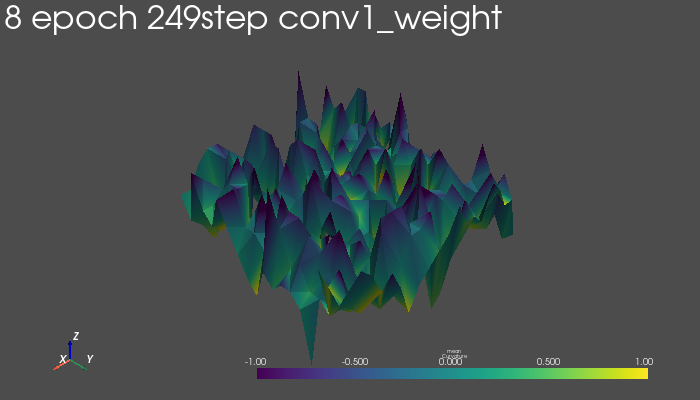

Epoch [8/10], Step [300/600], Loss: 0.0095
Epoch [8/10], Step [400/600], Loss: 0.0012


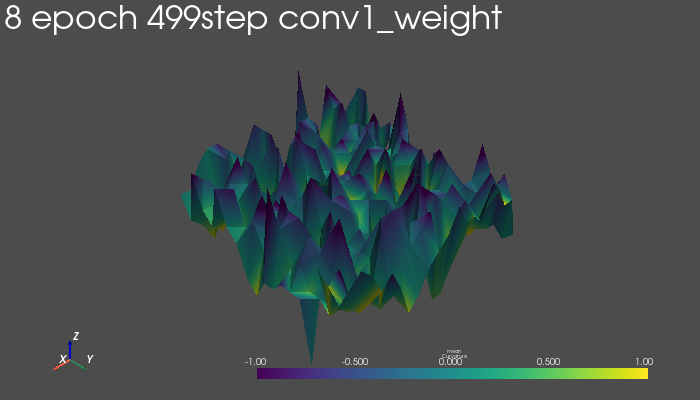

Epoch [8/10], Step [500/600], Loss: 0.0003
Epoch [8/10], Step [600/600], Loss: 0.0056
Epoch [9/10], Step [100/600], Loss: 0.0008
Epoch [9/10], Step [200/600], Loss: 0.0046


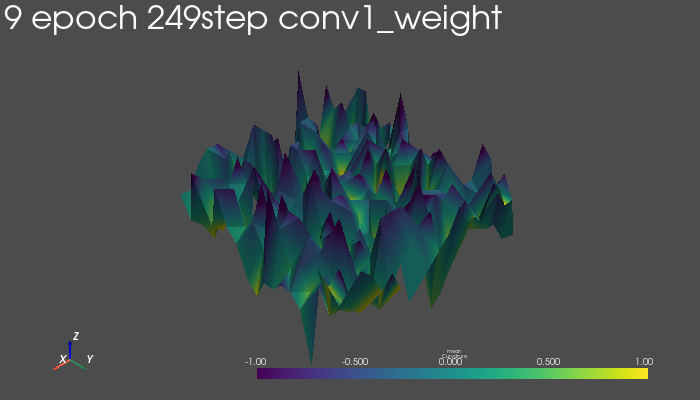

Epoch [9/10], Step [300/600], Loss: 0.0128
Epoch [9/10], Step [400/600], Loss: 0.0012


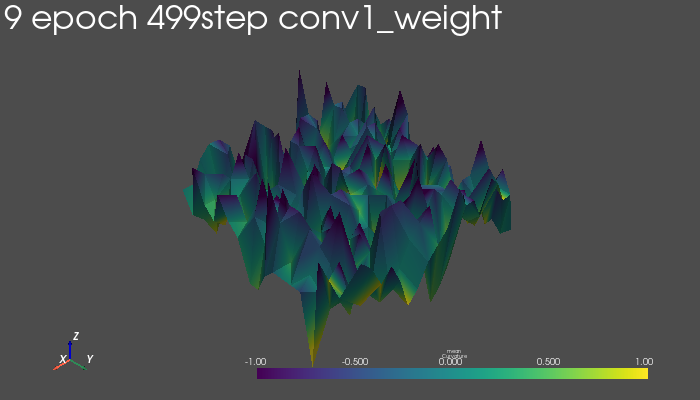

Epoch [9/10], Step [500/600], Loss: 0.0070
Epoch [9/10], Step [600/600], Loss: 0.0254
Epoch [10/10], Step [100/600], Loss: 0.0095
Epoch [10/10], Step [200/600], Loss: 0.0005


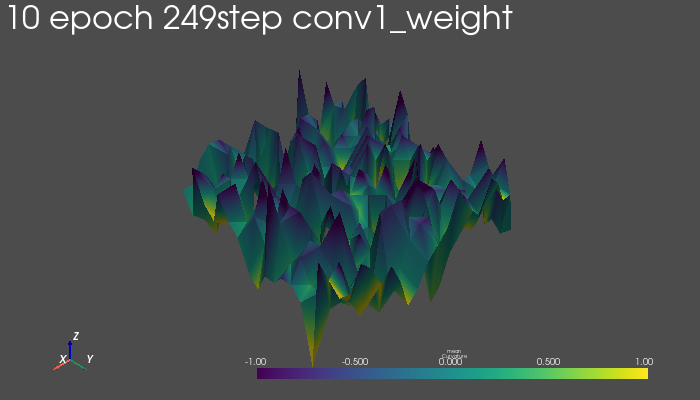

Epoch [10/10], Step [300/600], Loss: 0.0033
Epoch [10/10], Step [400/600], Loss: 0.0219


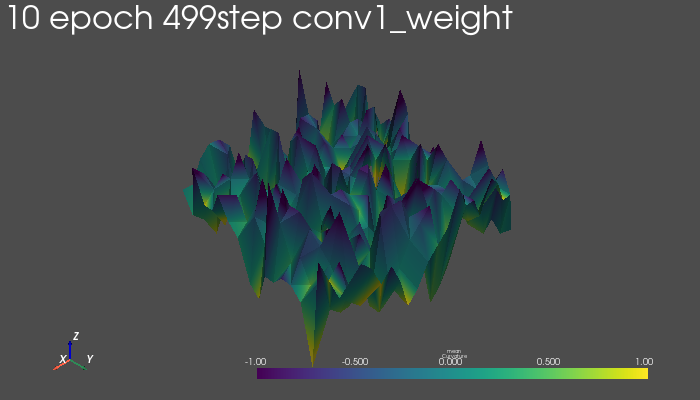

Epoch [10/10], Step [500/600], Loss: 0.0107
Epoch [10/10], Step [600/600], Loss: 0.0115


In [53]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# basic block 
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
x, y = np.meshgrid(x, y)
CONV_BLOCK = np.zeros((20,20))
GRAD_BLOCK = np.zeros((20,20))
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        
        # weight value save
        if (i+1) % 250 == 0:
            BLOCK_VALUE = model.conv1.weight.cpu().detach().numpy()

            for index in range(0,16):
                x =  ((index)%4)*5 
                y =  (index//4)*5
                CONV_BLOCK[x:x+5, y:y+5] =BLOCK_VALUE[index][0] 

            z = CONV_BLOCK*20

            x = np.arange(0, 20, 1)
            y = np.arange(0, 20, 1)
            x, y = np.meshgrid(x, y)

            grid = pv.StructuredGrid(x, y, z)

            name = "conv/"+str(epoch)+"epoch"+ str(i+1)+" step"+".png"
            grid_name = str(epoch+1) +" epoch " + str(i)+"step conv1_weight"
            grid = grid.plot_curvature(clim=[-1, 1], screenshot=name,text =grid_name,window_size=(700,400))

        
        loss.backward()
        
        
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


In [54]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 98.89 %


In [56]:
# to gif
# Create the frames
frames = []
imgs = glob.glob("conv/*.png")
dex = 0
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
    dex+=1
    

# Save into a GIF file that loops forever
frames[0].save('conv_weight.gif', format='GIF',append_images=frames[1:],save_all=True, duration=10,loop=0)
